## Boston Housing Price Prediction


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [176]:
df = pd.read_csv("boston.csv")
df["CHAS"].value_counts()
df.describe()
# np.array(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.28443,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.70430,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.56100,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.88475,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.21000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.62600,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [177]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

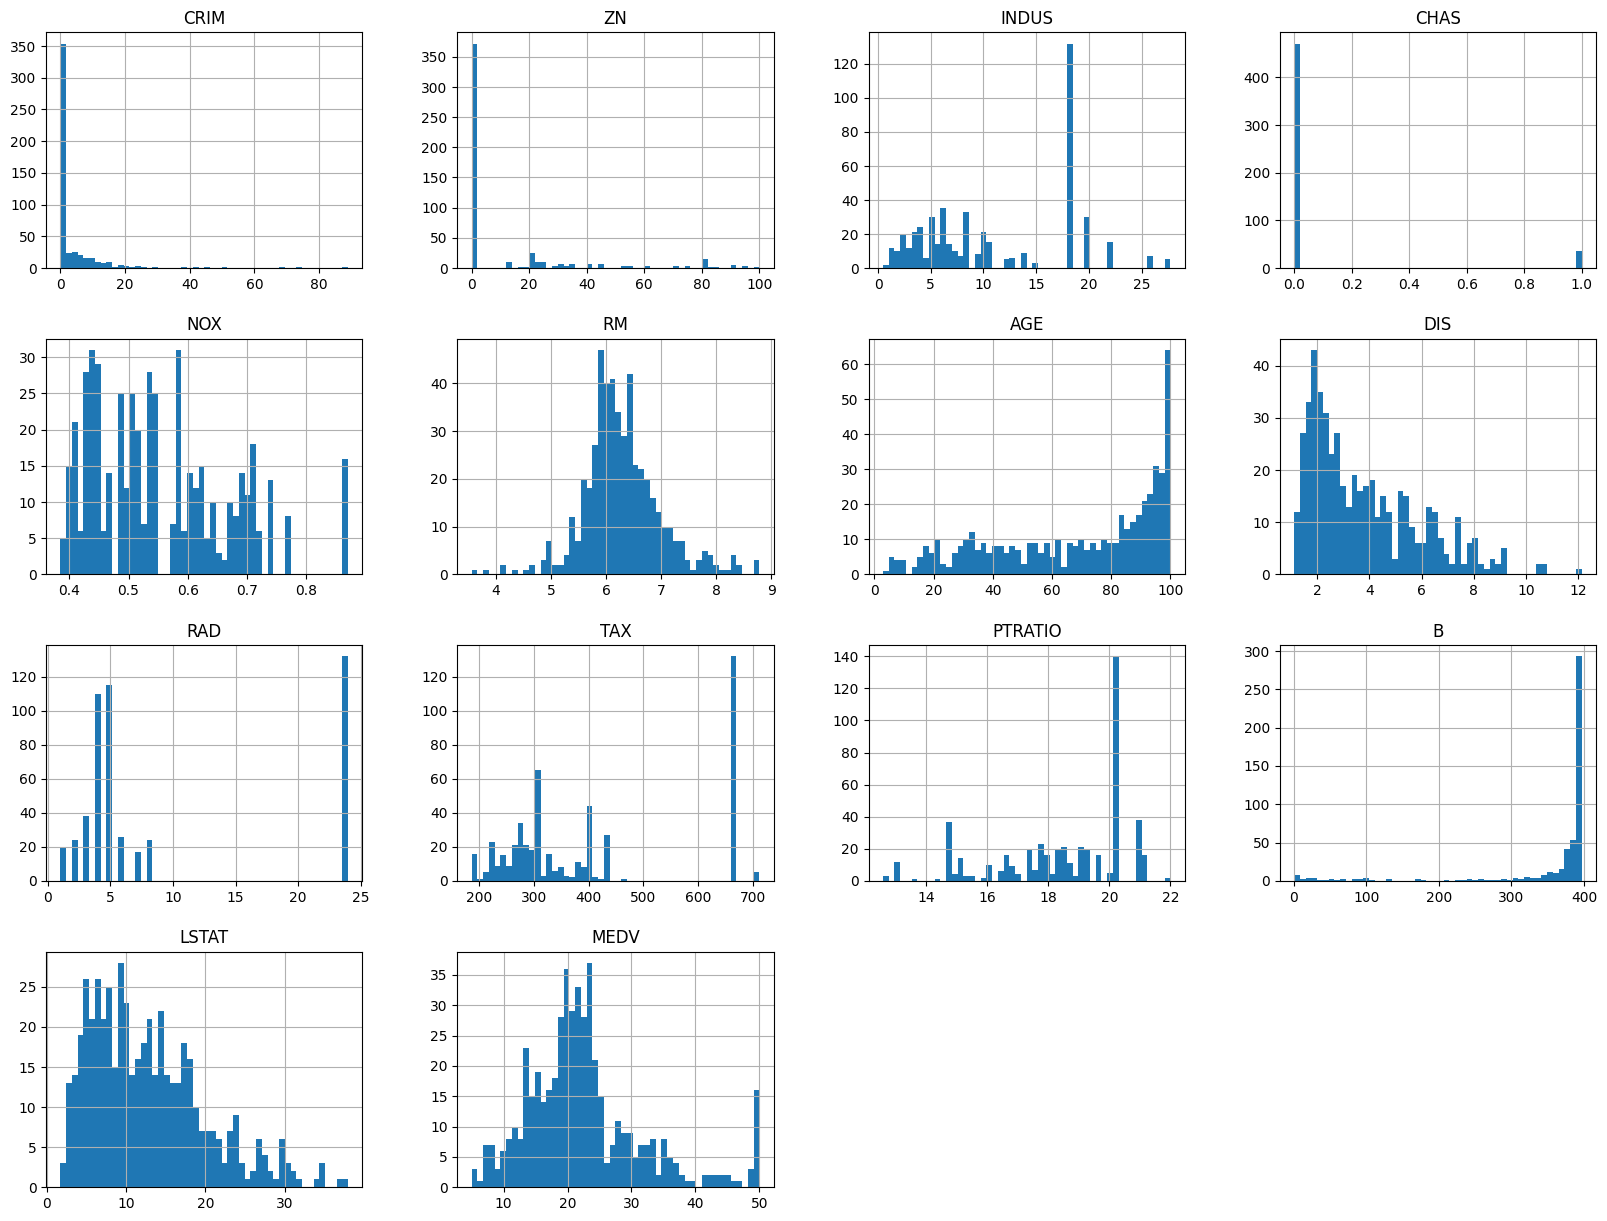

In [178]:
# import matplotlib.pyplot as plt
df.hist(bins = 50,figsize=(20,15))


Train Test Split

In [179]:
def split_tain_test(data, split_ratio):
    np.random.seed(42)
    np.random.shuffle(data)
    print(data)
    return data[:int(split_ratio*len(data))], data[int(split_ratio*len(data)):]

data = np.array([[1,2,3,4,5]])
test, train = split_tain_test(data= np.array(df), split_ratio = 0.2)
print(len(train))
print(len(test))


[[9.17800e-02 0.00000e+00 4.05000e+00 ... 3.95500e+02 9.04000e+00
  2.36000e+01]
 [5.64400e-02 4.00000e+01 6.41000e+00 ... 3.96900e+02 3.53000e+00
  3.24000e+01]
 [1.05740e-01 0.00000e+00 2.77400e+01 ... 3.90110e+02 1.80700e+01
  1.36000e+01]
 ...
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 3.90940e+02 5.99000e+00
  2.45000e+01]
 [1.11604e+01 0.00000e+00 1.81000e+01 ... 1.09850e+02 2.32700e+01
  1.34000e+01]
 [2.28760e-01 0.00000e+00 8.56000e+00 ... 7.08000e+01 1.06300e+01
  1.86000e+01]]
405
101


In [180]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train["CHAS"].value_counts())
print(test['CHAS'].value_counts())

CHAS
0    375
1     29
Name: count, dtype: int64
CHAS
0    96
1     6
Name: count, dtype: int64


In [181]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_split,test_split in split.split(df,df['CHAS']):
    train_dataset = df.loc[train_split]
    test_dataset = df.loc[test_split]

df_train_features = train_dataset.drop("MEDV",axis=1)
df_train_labels = train_dataset["MEDV"]
# df_train["CHAS"].value_counts()

# df_train.describe()

# print(train_dataset["CHAS"].value_counts())
# print(test_dataset["CHAS"].value_counts())

Looking for Correlations 

In [182]:
corr_matrix = df.corr()
corr_matrix["MEDV"].sort_values(ascending=True)
# corr_matrix[""].sort_values(ascending=True)


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.693008
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

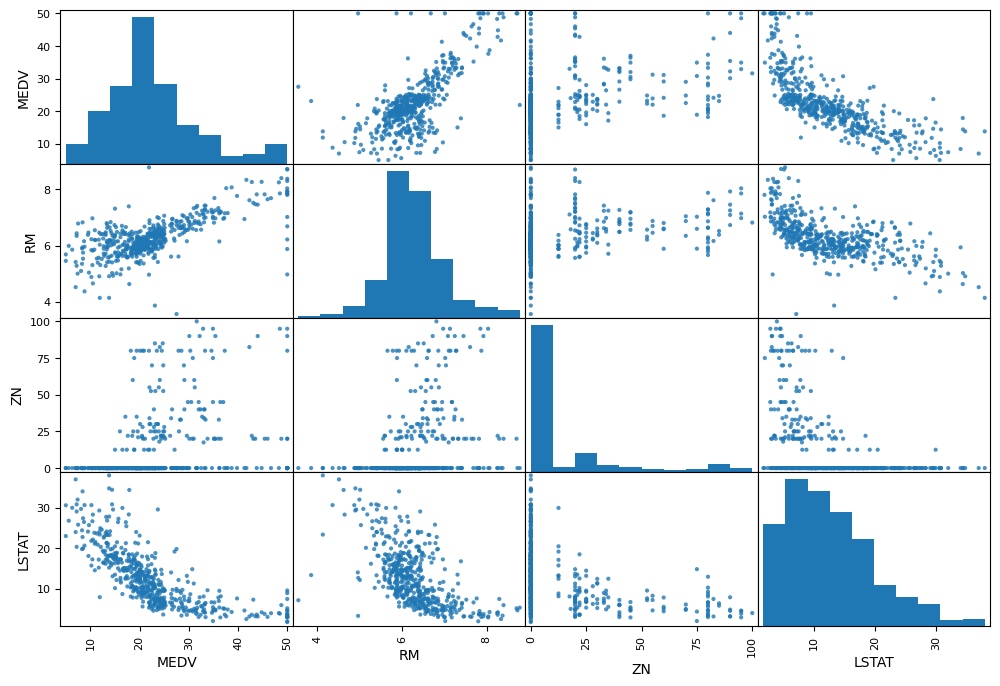

In [183]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(df[attributes],figsize=(12,8),alpha=0.8)



<Axes: xlabel='DIS', ylabel='INDUS'>

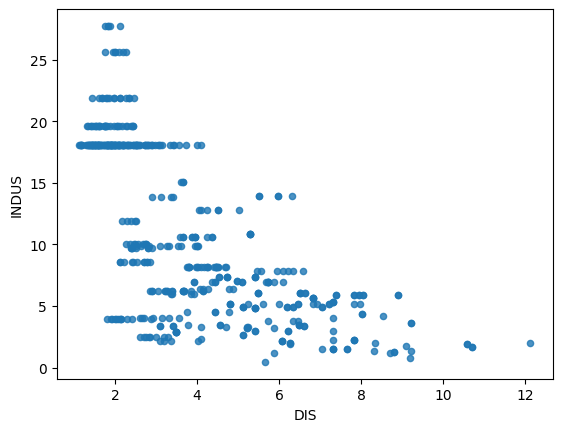

In [184]:
df.plot(kind="scatter",x="DIS",y="INDUS",alpha=0.8)

Trying out Attribute Combination

In [185]:
# df["TAXRM"] = df["TAX"]/df["RM"]
# corr_matrix = df.corr()
# corr_matrix["TAX"].sort_values(ascending=True)


<Axes: xlabel='TAX', ylabel='RAD'>

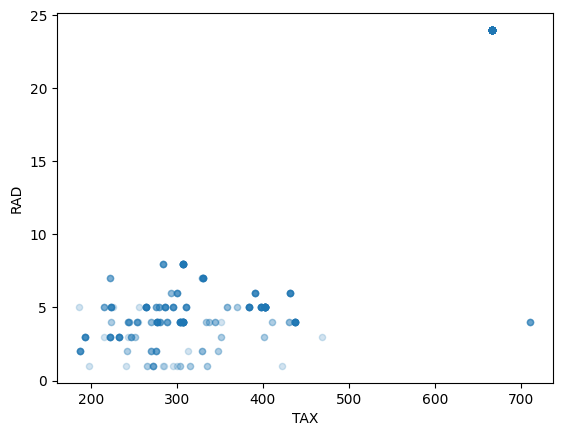

In [186]:
df.plot(kind="scatter",x="TAX",y="RAD",alpha=0.2)

In [187]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.28443,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.70430,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.56100,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.88475,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.21000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.62600,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Ways to deal with missing values
1) Drop the datapoints (rows) 
2) Drop the column (attribute)
3) Fill the missing values with (0,mean or median)

In [188]:
# 1st method removes rows which has null val
a = df.dropna(subset=["RM"])
a.shape


(500, 14)

In [189]:
# 2nd method remove the column which has null values
df.drop("RM",axis=1)
# we can see there is no "RM" column

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [190]:
# 3rd method replace null values with mean or median
median = df["RM"].median()
df.fillna(median)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [191]:
# before filling the missing values
df_train_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.27958,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.71522,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.56100,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.87825,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.21750,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.63075,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [192]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
z = imputer.fit(df_train_features)
print(z)

SimpleImputer(strategy='median')


In [193]:
imputer.statistics_.shape

(13,)

In [194]:
x = imputer.transform(df_train_features)


In [195]:
housing_tr = pd.DataFrame(x,columns=df_train_features.columns)
# After filling the missing values
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278658,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709916,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Scikit-learn Design

Primarily 3 types of objects 
1. Estimators - it estimates a parameter based on the dataset. Eg imputer
it has fit() and transform()
fit() - fits the dataset and calculates the internal parameters

2. Transformers - Transform method takes input and return output based on the learnings from fit()

3. Predictors - LinearRegression is an example for predictor 


Feature Scaling 

Two types of feature scaling 
1. Min max scaling (gives a value between 0-1)
(val - min)/(max -min)


2. standardization (standard normal distribution)
(val - mean)/standard deviation

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # for filling all the missing values
    ("std_scaler", StandardScaler()) # for standard normal distribution
])

In [197]:
z = my_pipeline.fit_transform(df_train_features)
z.shape

(404, 13)

Selecting a desired model for Dragon Real Estates

In [198]:
# model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(z,df_train_labels)


RandomForestRegressor()

In [199]:
example_data = df_train_features.iloc[:5]
example_labels = df_train_labels.iloc[:5]
prepared_data = my_pipeline.transform(example_data)
model.predict(prepared_data)

array([22.504, 25.262, 16.362, 23.355, 23.338])

In [200]:
list(example_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

Evaluating the model

In [201]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(z)
lin_mse = mean_squared_error(df_train_labels,housing_prediction)
rms = np.sqrt(lin_mse)
print(rms) # if we use Decision tree then we just overfitted the model so we dont use decision tree



1.180881168517144


In [202]:
# print(sum((df_train_labels - housing_prediction)**2)/len(df_train_labels))


We try the cross validation method to find the score

In [203]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, z,df_train_labels,scoring="neg_mean_squared_error",cv=10)
rmse = np.sqrt(-scores)
rmse



array([2.79968828, 2.64773744, 4.56620344, 3.70548902, 3.05805001,
       2.66823277, 4.55546759, 3.39373669, 3.08471277, 3.3858889 ])

In [204]:
def print_scores(scores):
    print("Mean : ", scores.mean())
    print("Standard Dev : ", scores.std())

In [205]:
print_scores(rmse)

Mean :  3.386520690713271
Standard Dev :  0.6682045359915543


Decision Tree Regressor
    Mean :  4.507242254582495, 
    Standard Dev :  0.7836901857791807

Linear Regression:
    Mean :  5.0763007522672, 
    Standard Dev :  1.0125555851256336

Random Forest Regressor:
    Mean :  3.386520690713271, 
    Standard Dev :  0.6682045359915543

In [206]:
from joblib import dump, load
dump(model, "Dragon_Real_Estate.joblib")

['Dragon_Real_Estate.joblib']

## Testing the model

In [213]:
X_test = test_dataset.drop("MEDV",axis=1)
y_test = test_dataset["MEDV"].copy()
transformed_X_test = my_pipeline.transform(X_test)
final_predicted_test_val = model.predict(transformed_X_test)
final_mse = mean_squared_error(y_test,final_predicted_test_val)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_predicted_test_val,list(y_test))


2.984717758522437
[24.497 11.691 25.654 22.015 18.446 14.924 19.891 14.58  31.557 39.064
 19.997 11.767 24.742 24.169 19.444 10.852 31.756 14.409 23.511 19.026
 19.986 18.099 15.224 21.868 18.053 32.773 16.22  34.268  8.981 33.811
 24.22  21.384 23.148 11.222 20.887 11.137 40.07  24.239 23.645 40.461
 23.821 29.134 20.533 20.767 19.238 33.746 44.167 19.876 20.322 21.575
 21.178 14.639 21.062 15.002 24.524 32.809 41.756 28.399 19.421 20.866
 47.092  9.89  19.172 24.445 14.988 32.514 19.415 18.2   18.814 34.331
 29.9   23.028 21.705 22.337 35.091 12.667 16.054 20.032 20.775 21.489
 22.825 21.51  14.225 22.885 20.825 21.22  13.86  21.346 22.069 23.151
 18.581 27.649  7.292 25.574 18.818 30.279 19.853 31.039 14.22  26.648
 20.963 20.362] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7